In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [4]:
save_plot = False

currentNotebook = 'sample_angles'

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [7]:
rnd = np.random.RandomState(43)

In [11]:
colors = cm.Set1(np.linspace(0, 1, 9))

# Epair

In [12]:
def get_new_psi_pairprod_exp(E, E_, rnd_state):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum
    theta = rnd_state.exponential(rms_theta**2)
    return np.sqrt(theta), rms_theta

theta = get_new_psi_pairprod_exp(1e3, 6e1, rnd)
print(theta)

(0.0014450412193478923, 0.0025202653385447025)


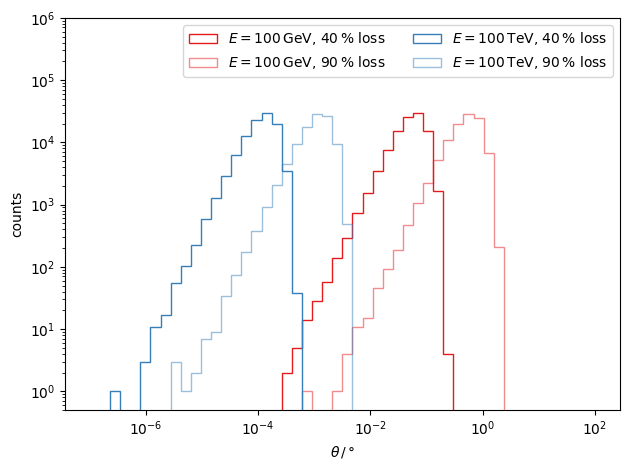

In [13]:
# plot_style()
n_events = 100000
bins = np.logspace(-7, 2, 51)
E = 1e2 # in GeV
E_ = 6e1 # in GeV
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd)[0] for i in range(n_events)]

E = 1e2
E_ = 1e1
psi_09 = [get_new_psi_pairprod_exp(E, E_, rnd)[0] for i in range(n_events)]
plt.hist(np.rad2deg(psi_04), color=colors[0], histtype='step', bins=bins, label=r'$E = 100\,\mathrm{GeV}$, $40\,\%$ loss')
plt.hist(np.rad2deg(psi_09), color=colors[0], alpha=0.5, histtype='step', bins=bins, label=r'$E = 100\,\mathrm{GeV}$, $90\,\%$ loss')



E = 1e5
E_ = 6e4
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd)[0] for i in range(n_events)]
E = 1e5
E_ = 1e4
psi_09 = [get_new_psi_pairprod_exp(E, E_, rnd)[0] for i in range(n_events)]
plt.hist(np.rad2deg(psi_04), color=colors[1], histtype='step', bins=bins, label=r'$E = 100\,\mathrm{TeV}$, $40\,\%$ loss')
plt.hist(np.rad2deg(psi_09), color=colors[1], alpha=0.5, histtype='step', bins=bins, label=r'$E = 100\,\mathrm{TeV}$, $90\,\%$ loss')


plt.yscale('log')
plt.xscale('log')
plt.ylabel('counts')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylim(5e-1, 1e6)
plt.legend(ncol=2)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'epair_100GeV_100TeV.pdf')

# DeltaE

In [20]:
def get_new_psi_deltaE_NEW(E_mu, E_mu_prime, m_mu = 105.6583755, m_e = 0.51099895, is_degree=True):
    assert E_mu > m_mu, 'incoming energy lower than muon mass'
    
    gamma = E_mu / m_mu
    epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
    assert E_mu_prime > E_mu - epsilon_max
    
    p_mu = np.sqrt((E_mu + m_mu) * (E_mu - m_mu))
    p_mu_prime = np.sqrt((E_mu_prime + m_mu) * (E_mu_prime - m_mu))
    
    cos_theta = ((E_mu + m_e) * E_mu_prime - E_mu*m_e - m_mu**2) / (p_mu * p_mu_prime)
    theta_mu = np.arccos(cos_theta)
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu

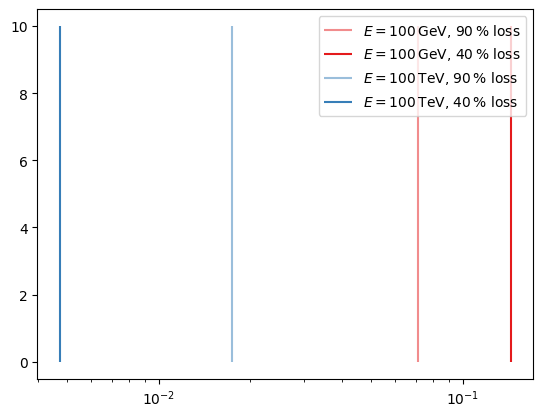

In [29]:
theta = get_new_psi_deltaE_NEW(1e2*1e3, 1e1*1e3)
plt.vlines(theta, 0, 10, color=colors[0], alpha=0.5, label=r'$E = 100\,\mathrm{GeV}$, $90\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e2*1e3, 6e1*1e3)
plt.vlines(theta, 0, 10, color=colors[0], label=r'$E = 100\,\mathrm{GeV}$, $40\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e5*1e3, 1e4*1e3)
plt.vlines(theta, 0, 10, color=colors[1], alpha=0.5, label=r'$E = 100\,\mathrm{TeV}$, $90\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e5*1e3, 6e4*1e3)
plt.vlines(theta, 0, 10, color=colors[1], label=r'$E = 100\,\mathrm{TeV}$, $40\,\%$ loss')


plt.xscale('log')
plt.legend()

# photonuclear